Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 10.25 

Category 5 hurricanes in the North Atlantic occurred more often when Tom Brady won the Superbowl. Here we show this is not a statistically significant phenomenon by applying a permutation test\
Topics: [Permutation test, nonparametric testing](https://www.youtube.com/watch?v=frSkAi36qd0)

Author: Carlos Fernandez-Granda

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
# matplotlib.rcParams['text.usetex'] = True
from scipy.stats import norm
import random

from numpy.random import default_rng
rng = default_rng(2021)

font_size = 20
font_size_legend = 20
font_size_ticks = 20

n_1 = 7
n_2 = 13

hurricanes_1 = 4
hurricanes_2 = 4

mean_wins_superbowl = hurricanes_1/n_1
mean_doesnt_win = hurricanes_2/n_2

In [2]:
data = np.zeros(n_1 + n_2)
data[:(hurricanes_1 + hurricanes_2)] = 1.
m = 1000000
test_statistic_samples = np.zeros(m)
for ind in range(m):
    random.shuffle(data)
    test_statistic_samples[ind] = np.mean(data[:n_1])-np.mean(data[n_1:])

p value 0.251


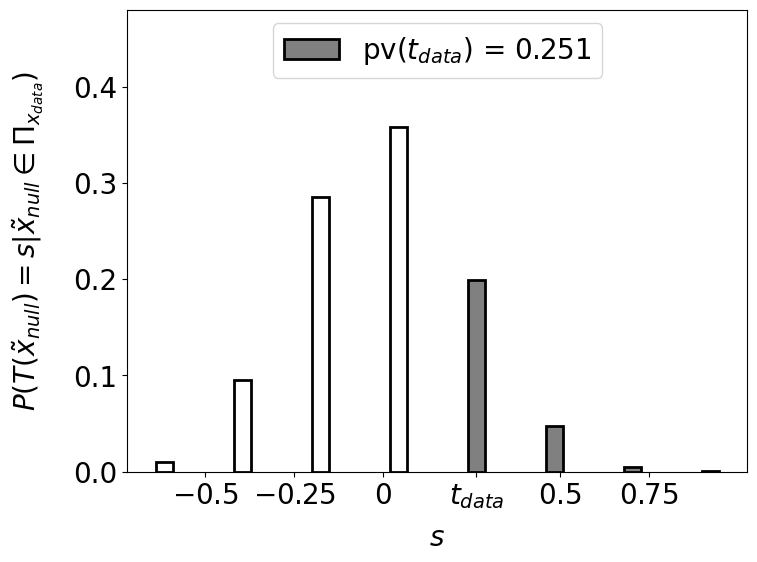

In [5]:
values, counts = np.unique(test_statistic_samples, return_counts=True) # Values and counts of the test statistic over all the permutations
prob = counts/m # Probability of each value

observed = mean_wins_superbowl-mean_doesnt_win
p_value = np.sum(prob[values >= observed])
print("p value",round(p_value,3))

plt.figure(figsize=(8,6))
plt.bar(values[values < observed],prob[values < observed], width = 0.05, color = "white", edgecolor="black",linewidth = 2)
plt.bar(values[values >= observed],prob[values >= observed], width = 0.05, color = "gray", edgecolor="black",
        linewidth = 2, label = r"pv$(t_{data})$ = " + str(np.round(p_value,3)))
plt.xticks([-0.5,-0.25,0,observed,0.5,0.75],[r'$-0.5$',r'$-0.25$',r'$0$',r'$t_{data}$',r'$0.5$',r'$0.75$'],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,0.48])
plt.ylabel(r"$P(T(\tilde{x}_{null}) = s| \tilde{x}_{null} \in \Pi_{x_{data}})$",fontsize=font_size_ticks,labelpad = 20)
plt.xlabel(r'$s$',labelpad = 10,fontsize=font_size)
plt.legend(fontsize=font_size,loc="upper center");